# Tarea 3 - Inteligencia Artificial

### Santiago Laguna - 17636671

## Cargar datos

In [1]:
# Para esta parte, se usa como base el código de la ayundatía
import json

def parse_data(filename):
    with open(filename) as file:
        items = [json.loads(line) for line in file.readlines()]
    return items

data = parse_data('dataset/Sarcasm_Headlines_Dataset_v2.json')

In [2]:
x = [row['headline'].replace("'","").replace('"', "").replace(":","") for row in data]
y = [row['is_sarcastic'] for row in data]

# Revisamos que se hayan cargado correctamente
#tot_registros = len(y)
#tot_sarcasticos = sum(y)
#tot_no_sarcasticos = tot_registros - tot_sarcasticos
#print('total de registros no sarcasticos: '+ str(tot_no_sarcasticos))
#print('total de registros sarcasticos: '+ str(tot_sarcasticos))


## Eliminación de Stop-Words

In [3]:
# source: spacy.lang.en.stop_words
STOP_WORDS = {'whoever', 'five', 'becoming', 'am', 'whether', 'yet', 'under', 'none', 'she', 'yours', 'me', 'serious', 
              'while', 'wherever', 'namely', 'using', "'ll", 'hereupon', 'her', 'meanwhile', 'take', 'each', 'formerly', 
              'front', 'again', 'almost', 'full', 'yourself', 'be', 'just', 'another', 'become', 'toward', 'himself', 
              'seemed', 'a', 'thence', 'why', 'besides', 'bottom', 'must', 'now', 'hundred', 'really', 'where', 'it', 
              'if', 'out', 'down', 'around', 'is', 'that', 'were', 're', 'wherein', 'also', 'however', 'hereby', 'regarding', 
              'to', 'towards', 'eight', 'you', 'who', 'but', 'perhaps', 'thereupon', 'was', 'whom', 'enough', 'n’t', 'only', 
              'empty', "'re", 'alone', 'seem', 'nor', "'ve", '’m', 'at', 'then', 'third', 'with', 'yourselves', 'though',
              'four', 'done', 'off', 'any', 'here', 'onto', 'them', "'s", '’s', 'first', 'except', 'doing', 'due', 'often', 
              'twelve', 'anyhow', 'same', "'m", 'very', 'over', 'herself', 'made', 'three', 'ca', 'no', 'will', 'anyway', 
              'because', 'their', 'has', '’ll', 'fifteen', 'former', 'across', 'already', 'nowhere', 'together', 'latter', 
              'keep', 'beyond', 'move', 'own', 'on', 'how', 'nine', 'there', 'ourselves', 'beside', 'through', 'what', 
              'hers', 'the', 'into', '‘s', "'d", 'thereafter', 'whatever', 'such', 'make', 'during', 'they', 'your', 
              'among', 'sometime', 'an', 'ours', "n't", 'mostly', 'please', 'therefore', 'upon', 'last', 'still', 
              '’d', 'us', 'rather', 'nobody', '‘re', '‘ve', 'few', 'hereafter', 'between', 'myself', 'thru', 'whereupon',
              '’re', 'least', 'less', 'nothing', 'whereas', 'either', 'indeed', 'should', 'by', 'or', 'i', 'more', 'most',
              'elsewhere', 'ten', 'next', 'than', 'eleven', 'ever', 'have', 'neither', 'further', 'being', 'somehow', 'our',
              'everyone', 'two', '’ve', 'so', 'since', 'too', 'before', 'been', 'quite', 'name', 'up', 'all', 'per', 'call', 
              'sometimes', 'twenty', 'which', 'both', 'not', 'side', 'themselves', 'anything', 'behind', 'everything',
              'thereby', 'its', 'whither', 'unless', 'can', 'whenever', 'always', 'became', 'seems', 'would', 'fifty',
              'say', 'something', '‘d', 'show', 'throughout', 'give', 'one', 'do', 'sixty', 'within', 'see', 'several',
              'everywhere', 'from', 'thus', 'many', 'my', 'along', 'top', 'whence', 'whereafter', 'as', 'seeming', 
              'somewhere', 'herein', 'well', 'part', 'does', 'put', 'others', 'afterwards', 'go', 'anywhere', 'his',
              'against', '‘m', 'although', 'used', 'becomes', 'without', 'every', 'moreover', 'therein', 'back', 'never',
              'get', 'these', 'much', 'and', 'forty', 'in', 'various', 'whereby', 'amount', 'whole', 'about', 'n‘t', 
              'other', 'otherwise', 'until', 'below', 'we', 'he', 'this', 'whose', 'for', 'beforehand', 'could', 'did', 
              'amongst', 'are', 'even', 'had', 'nevertheless', 'noone', 'above', 'via', 'him', 'anyone', 'might', 'of',
              'some', 'six', 'someone', 'mine', 'once', 'cannot', 'else', 'those', 'itself', '‘ll', 'may', 'when', 
              'latterly', 'hence', 'after'}


#pretest: print(x[:10])
x = [' '.join([word for word in row.split() if word.lower() not in STOP_WORDS]) for row in x]
#test: print(x[:10])

## Separamos el dataset

In [126]:
from sklearn.model_selection import train_test_split
X_entrenamiento_original, X_intermedio, Y_entrenamiento, Y_intermedio = train_test_split(x, y, test_size=0.3)
X_validacion_original, X_test_original, Y_validacion, Y_test = train_test_split(X_intermedio, Y_intermedio, test_size=0.5)

#print(len(X_entrenamiento_orginal), len(X_validacion_orginal), len(X_test_orginal))
#print(len(Y_entrenamiento), len(Y_validacion), len(Y_test)*7/1.5)


## Transformación a Vector de Frecuencias

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(X_entrenamiento_original)
X_entrenamiento = vectorizer.fit_transform(X_entrenamiento_original)
X_test = vectorizer.transform(X_test_original)
X_validacion = vectorizer.transform(X_validacion_original)

## Actividad 1

In [8]:
# source: https://stackoverflow.com/questions/10741346/numpy-most-efficient-frequency-counts-for-unique-values-in-an-array
import numpy as np

all_words = " ".join(x).split()
words, counts = np.unique(all_words, return_counts = True)

zipped = [x for x in zip(words, counts)]
zipped.sort(key=lambda x: x[1], reverse=True)
#test: print(zipped[:20])

In [9]:
words, counts = zip(*zipped)
#test: print(words[:10])
#test: print(counts[:10])

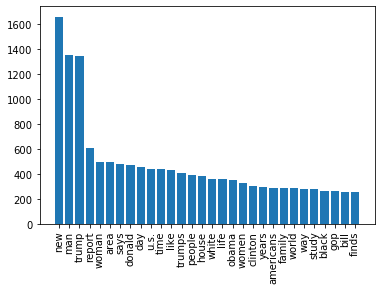

In [11]:
import matplotlib.pyplot as plt

# Revisamos las primeras 30 palabras para ver cuáles son las más repetidas
plt.xticks(rotation=90)
plt.bar(words[:30], counts[:30])
plt.rcParams["figure.figsize"] = [12, 9]

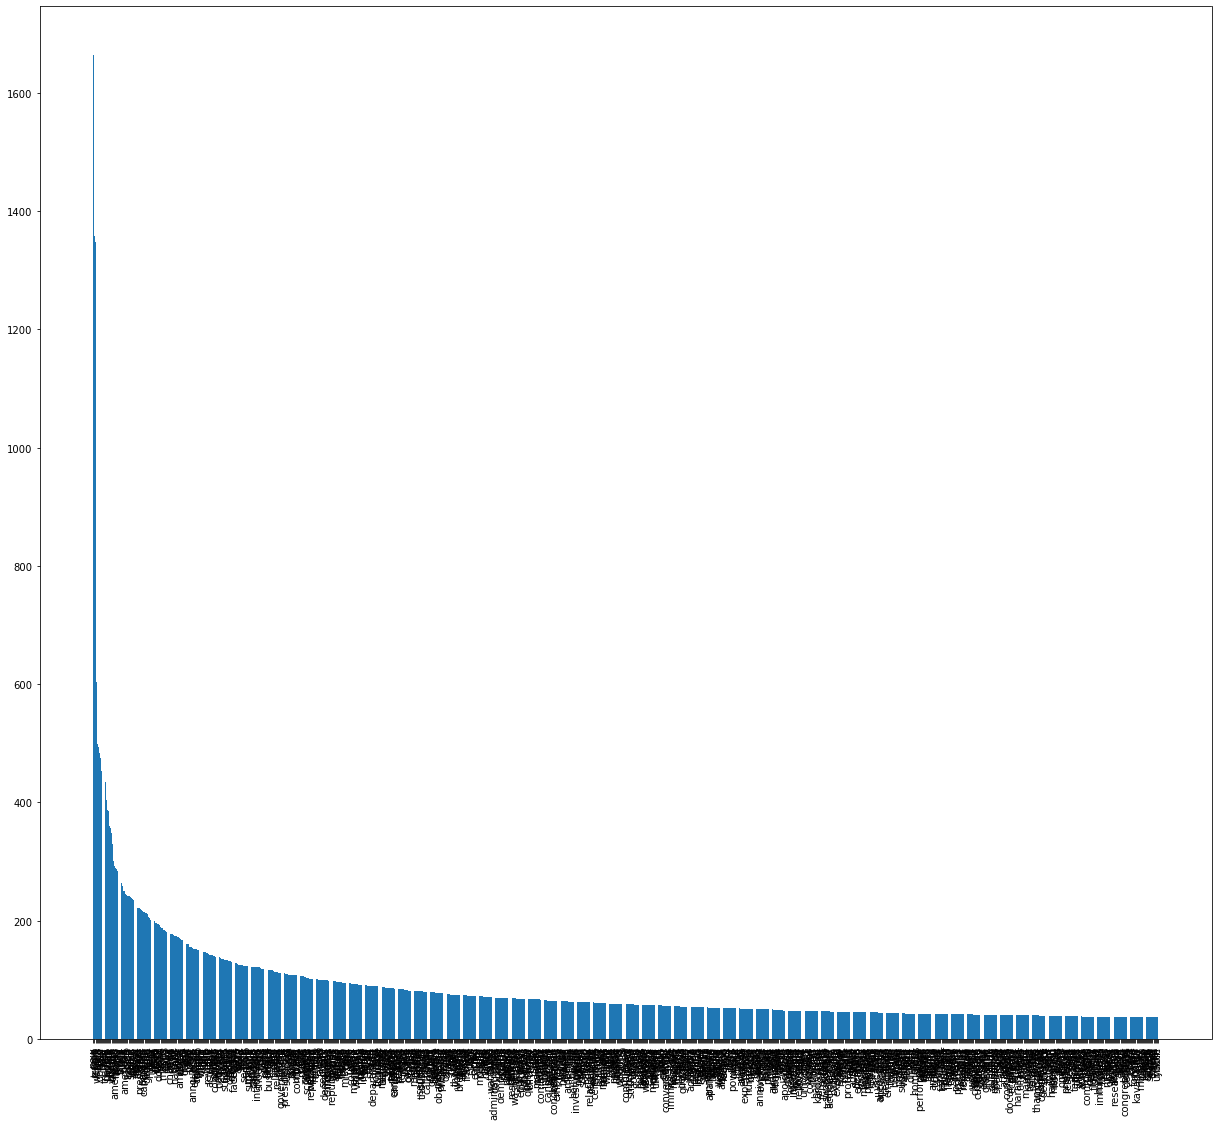

In [64]:
# Tomamos las primeras 1000 palabras para ver la curva de frecuencia
plt.xticks(rotation=90)
plt.bar(words[:1000], counts[:1000])
plt.rcParams["figure.figsize"] = [21, 19]

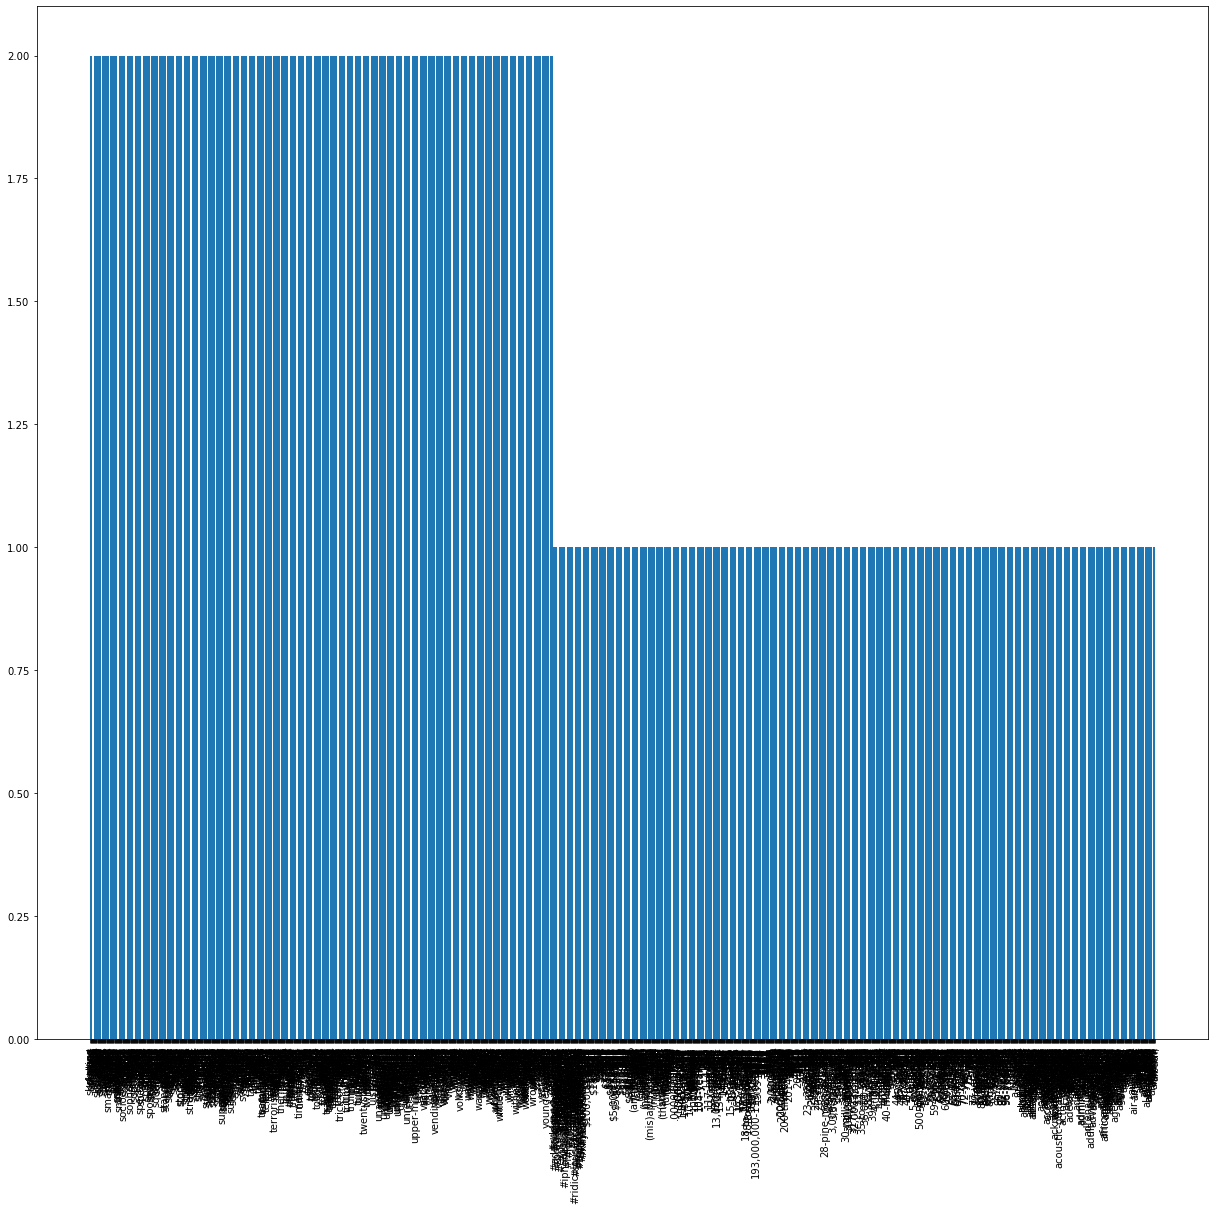

In [136]:
# Como se puede apreciar hay muchas palabras que no se repiten o se repiten una sola vez
# Esto es perjudicial pues la información obtenida de estos datos será muy poco certera
plt.xticks(rotation=90)
plt.bar(words[15000:17000], counts[15000:17000])  # notar que es una muestra cercana a la mitad del set
plt.rcParams["figure.figsize"] = [21, 19]

Análisis:

Como se puede apreciar en el gráfico, existen varias palabras muy repetidas que dan cuenta de un sesgo importante en el dataset utilizado. En particular, notamos que la palabra "man" se repite más del doble de veces que "woman" y una distinción de género no debiese afectar a la hora de determinar si un texto es sarcástico o no (aunque probablemente si lo haga, pues es un sesgo introducido por las personas que escribieron las noticias).

Otras palabras muy repetidas que llaman la atención son "trump", "obama", "bill" y "clinton". Esto nos indica que las noticias están fuertemente vinculadas con EEUU (lo cual es lógico, dado el origen del dataset). Lo anterior, implicará que un análisis de noticias de otros países tendrán un mayor error proveniente de este sesgo. 

Además, las palabras difieren mucho en la cantidad de veces que se repiten. Esto podría ser una fuente importante de overfitting o sesgo dependiendo del clasificador a utilizar. Las palabras "new", "man" y "trump" en especial, son las más preocupantes dada su alta frecuencia. 

Por último, notamos que la curva del histograma es de la forma típica "1/X", es decir, hay pocas palabras que aparecen muchas veces y muchas palabras que apareceran muy poco. Esto no es bueno para ayudar a una buena predicción, pues aparte de los sesgos mencionados, se puede obtener muy poca información certera de las palabras que se repiten poco. Esto es perjudicial, pues será una fuente importante de error en la predicción cuando se usen estos datos.

## Actividad 2

La estrategia utilizada para preprocesar los datos fue BoW (Bag Of Words)

En esta estrategia, las características de los vectores serán la frecuencia con que aparece cada palabra. Es decir, se construye un array de frecuencias de las distintas palabras de cada texto que se desea codificar. 

Para lograr esto, previamente debemos obtener todas las palabras distintas que aparecen en el set de entrenamiento. Luego, el vector de características tendrá dimensión igual a la cantidad de palabras distintas en el set de entrenamiento. Esto quiere decir que al aplicar la transformación a vectores de las frases, si una palabra del set de validación o set de test no aparece en el set de entrenamiento, entonces esa palabra será ignorada (información perdida).

En particular, la clase CountVectorizer de sklearn nos retorna una sparse matrix al transformar una frase. Esta, es una representación de las palabras que contiene dicha frase en una estructura que tiene una gran cantidad de ceros. Por esto, se puede ver representada por varias tuplas (pares) que indican la dirección en el vocabulario del CountVectorizer (obtenido desde el set de entrenamiento) y la cantidad de veces que se repite cada palabra de la frase original.

Nota: los datos fueron pre-procesados más arriba, bajo el subtítulo "Transformación a Vector de Frecuencias"

## Actividad 3

In [138]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [128]:
# Aquí se muestra la forma en que se obtuvieron los resultados, más abajo se muestra una tabla resumen
# con los otros resultados obtenidos (pueden cambiar levemente los resultados obtenidos al cambiar los sets)
clf = SVC(C=0.2, kernel='linear', gamma='auto')
clf.fit(X_entrenamiento, Y_entrenamiento)

Y_predicted = clf.predict(X_entrenamiento)
print('Resultado predicción set de entrenamiento:', accuracy_score(Y_entrenamiento, Y_predicted))

Y_predicted = clf.predict(X_validacion)
print('Resultado predicción set de validación:', accuracy_score(Y_validacion, Y_predicted))

Resultado predicción set de entrenamiento: 0.9293166275645185
Resultado predicción set de validación: 0.7910552061495457


#### Nota: los resultados siguientes están aproximados

#### Tabla resultados entrenamiento 

C | poly | linear | rbf
--- | --- | --- | ---
0.1 | 0.524  | 0.892 | 0.524
0.2 | 0.524  | 0.927 | 0.524
0.3 | 0.524  | 0.944 | 0.524
0.4 | 0.524  | 0.953 | 0.524
0.5 | 0.524  | 0.960 | 0.524
1 | 0.524 | 0.978 | 0.524
10 | 0.524 | 0.999 | 0.526
100 | 0.524 | 1 | 0.682
1000 | 0.524 | 1 | 0.884
10000 | 0.524 | 1 | 0.976

#### Tabla resultados validación

C | poly | linear | rbf
--- | --- | --- | ---
0.1 | 0.521 | 0.793 | 0.521
0.2 | 0.521 | 0.803 | 0.521
0.3 | 0.521 | 0.801 | 0.521
0.4 | 0.521 | 0.798 | 0.521
0.5 | 0.521 | 0.793| 0.521
1 | 0.521 | 0.790 | 0.521
10 | 0.521 | 0.758 | 0.523
100 | 0.521 | 0.755 | 0.663
1000 | 0.521 | 0.753 | 0.790
10000 | 0.521 | 0.753 | 0.792

Como se puede apreciar, el kernel 'poly' (polinomial) fue el con peor rendimiento en ambos sets independiente del C utilizado. Una posible explicación a esto, es que el clasificador intenta separar las clases con un polinomio y esto no es posible dado que los datos están muy mezclados. 

Por otro lado vemos que el kernel 'linear' (lineal) mejora siempre para el set de entrenamiento a medida que aumentamos C. Sin embargo, el set de validación empieza a perder rendimiento de forma rápida llegado cierto punto. Esto se debe a que el clasificador está empezando a hacer "overfitting". Es importante notar, que el hecho de que un C más o menos pequeño muestre un mejor rendimiento en el set de validación, se debe a que no es tan bueno penalizar por errores de clasificación. Es decir, hay hartos vectores que podrían tener labels malos o no sean buenos indicadores de sus clases. 


Finalmente, el kernel 'rbf' (radial basis function) aumenta su rendimiento en ambos sets a medida que C crece (hasta donde se puede apreciar). Esto nos indica que, a pesar de no tener tan buen rendimiento con C bajo, la forma de penalización de este kernel es buena, permitiendole separar mejor las clases con un C grande (alta penalización).

## Actividad 4

In [141]:
# El mejor clasificador encontrado, según el test de validación, fue el siguiente:
# Es importante notar que los puntajes varian al utilizar sets de entrenamiento/validación distintos,
# en algunos casos el mejor C fue 0.3, pero en la mayoría de los casos el mejor clasificador fue el siguiente.

clf = SVC(C=0.2, kernel='linear', gamma='auto')
clf.fit(X_entrenamiento, Y_entrenamiento)

Y_predicted = clf.predict(X_test)
print('Resultado predicción set de test:', accuracy_score(Y_test, Y_predicted))
print('Confusion matrix:')
print(confusion_matrix(Y_test, Y_predicted))

print("Algunos ejemplos:")
for i in range(8):
    print()
    print(f"titular: {X_test_original[i]}")
    print("predicción: {}SARCASTIC, label original: {}SARCASTIC".format(Y_predicted[i]*'NOT ', Y_test[i]*'NOT '))

Resultado predicción set de test: 0.7863964593524342
Confusion matrix:
[[1864  371]
 [ 546 1512]]
Algunos ejemplos:

titular: fantasy baseball team suffers major setback owner embarks weeklong honeymoon internet access
predicción: SARCASTIC, label original: NOT SARCASTIC

titular: photographer documents grandmothers illness searching
predicción: SARCASTIC, label original: SARCASTIC

titular: marvelous mess
predicción: SARCASTIC, label original: SARCASTIC

titular: man arriving late forced use excuse saving leaving early
predicción: NOT SARCASTIC, label original: NOT SARCASTIC

titular: millions shrimp airlifted oil spill disaster zone
predicción: SARCASTIC, label original: NOT SARCASTIC

titular: mrs. jones singer billy paul died
predicción: SARCASTIC, label original: SARCASTIC

titular: trumps jerusalem embassy ceremony big dog whistle
predicción: SARCASTIC, label original: SARCASTIC

titular: new act, tommy tune vows vitamin spirit
predicción: NOT SARCASTIC, label original: SARCASTIC

Para escoger este clasificador, utilizamos el que tuviera un mejor rendimiento en el set de validación.

Como se puede apreciar, los titulares "trumps jerusalem embassy ceremony big dog whistle",
"mrs. jones singer billy paul died" son ejemplos de titulares sarcásticos bien categorizados.
Del mismo modo, "man arriving late forced use excuse saving leaving early" es un ejemplo de titular 
no sarcástico bien categorizado. 

Por otro lado, "millions shrimp airlifted oil spill disaster zone", "new act, tommy tune vows vitamin spirit" y 
"fantasy baseball team suffers major setback owner embarks weeklong honeymoon internet access" son ejemplos de titulares
que el clasificador no categoriza de forma correcta.

En los primeros casos, notamos que las frases tienen (en general) una gran cantidad de palabras que son bastante utilizadas. 
Mientras que en los casos que el clasificador más se equivoca, hay palabras que se repiten mucho y algunas que casi no se repiten. Esto nos muestra que la mala distribución y frecuencia de palabras con que fue entrenado el clasificador es propensa a generar muchos sesgos al momento de predecir.

## Actividad 5

In [47]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import learning_curve

In [88]:
CANTIDAD_EPOCAS = 30

def plot_curves(train_scores, validation_scores):
    # source: https://stackoverflow.com/questions/46912557/is-it-possible-to-get-test-scores-for-each-iteration-of-mlpclassifier
    plt.plot(train_scores, color='green', alpha=0.8, label='Train set loss curve')
    plt.plot(validation_scores, color='magenta', alpha=0.8, label='Validation set accuracy')
    plt.xlabel('Epochs')
    plt.legend(loc='upper left')
    plt.show()
    plt.rcParams["figure.figsize"] = [12, 9]

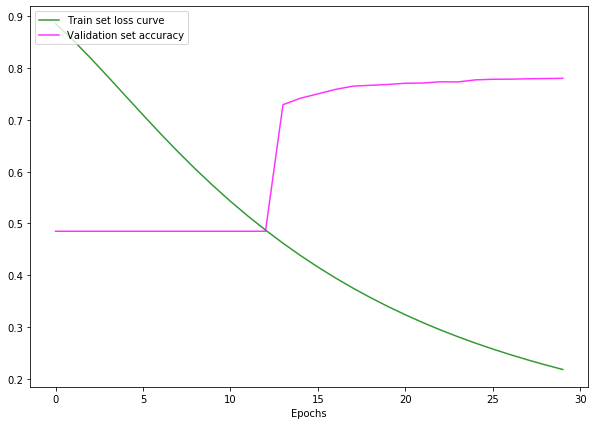

In [89]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(1))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

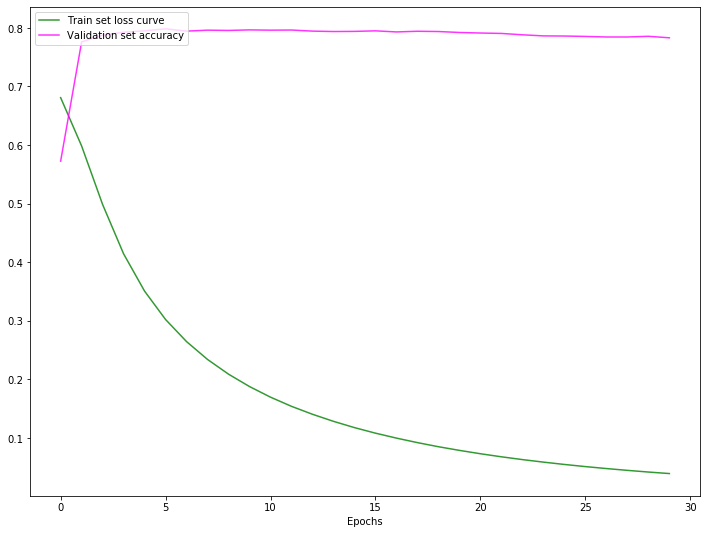

In [92]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(5))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

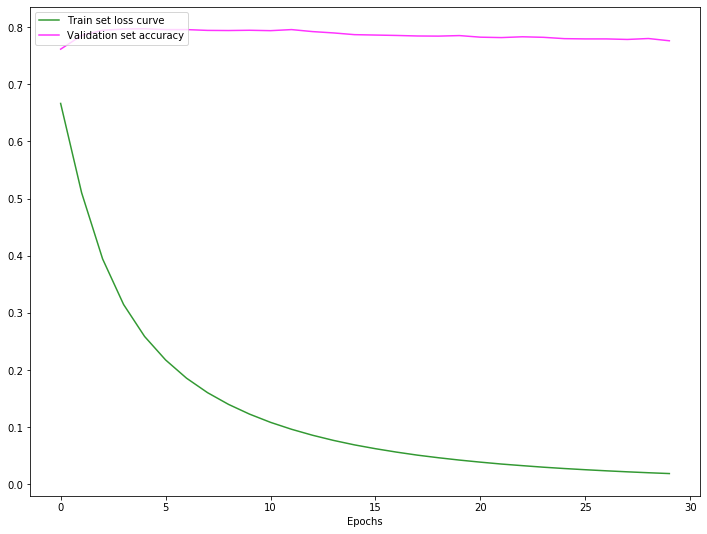

In [91]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(10))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

c:\users\qwesx\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\users\qwesx\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


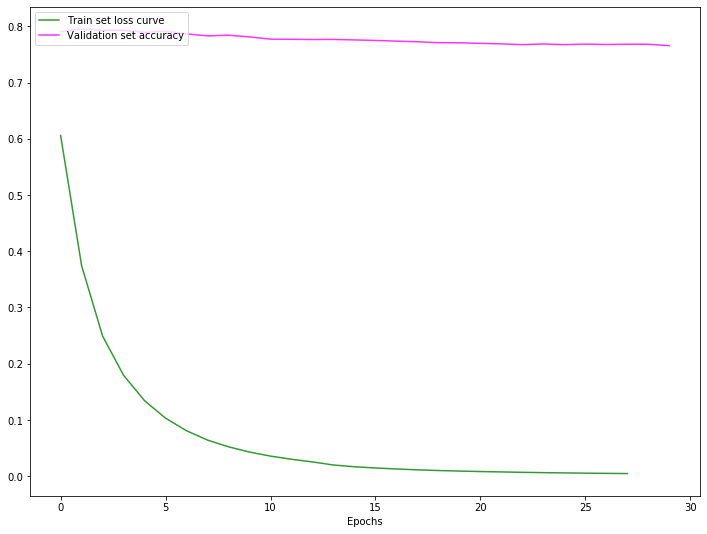

In [93]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(50))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

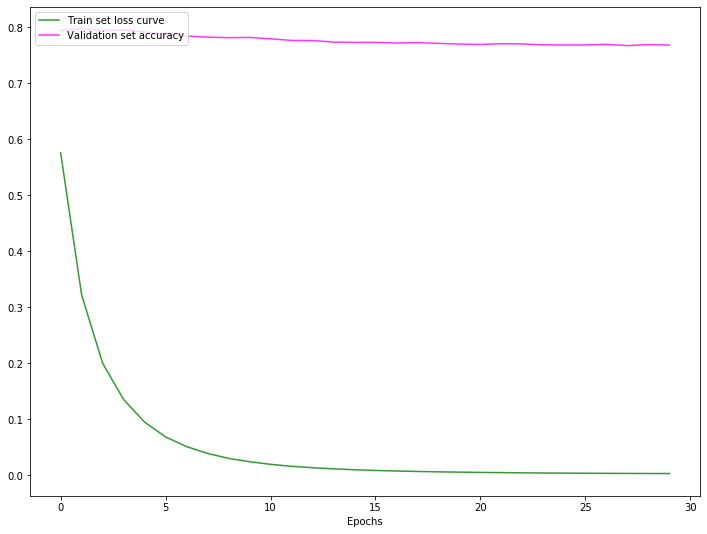

In [94]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(100))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

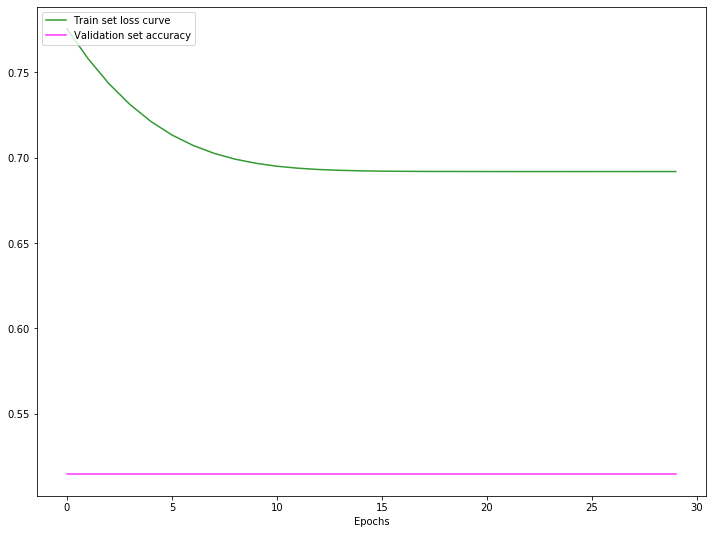

In [95]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(1, 1))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

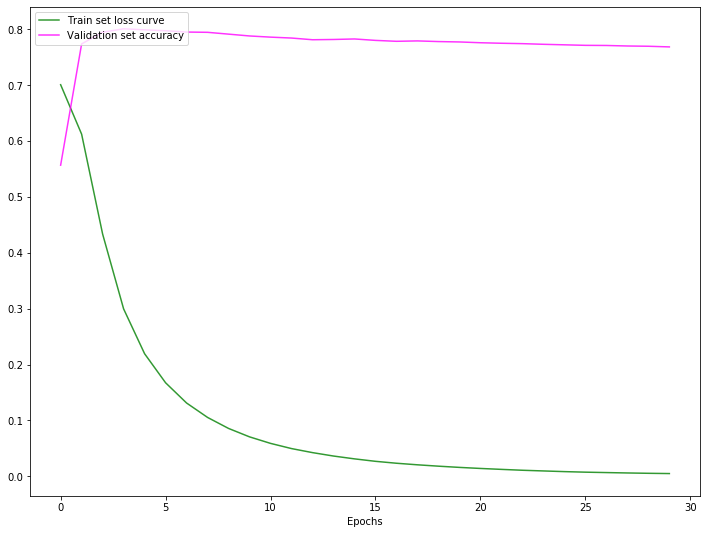

In [96]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(5, 5))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

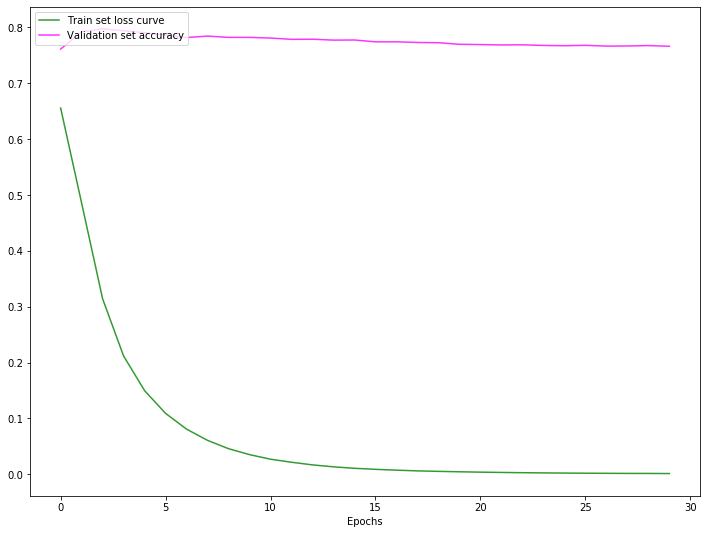

In [97]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(10, 10))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

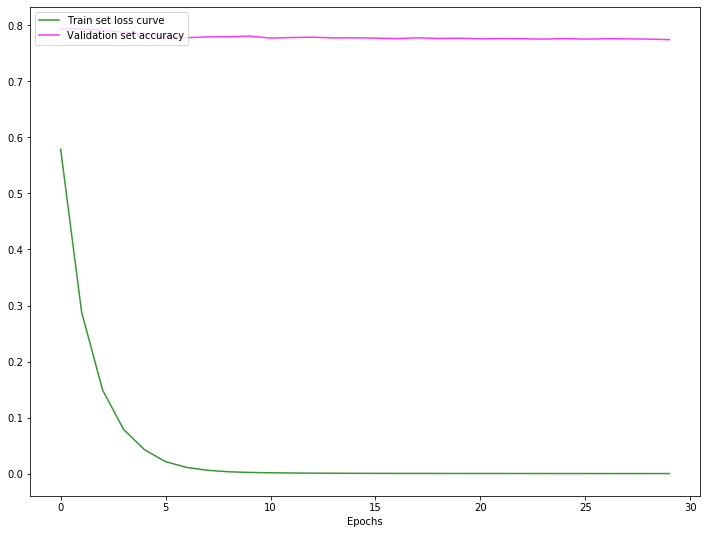

In [98]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(50, 50))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

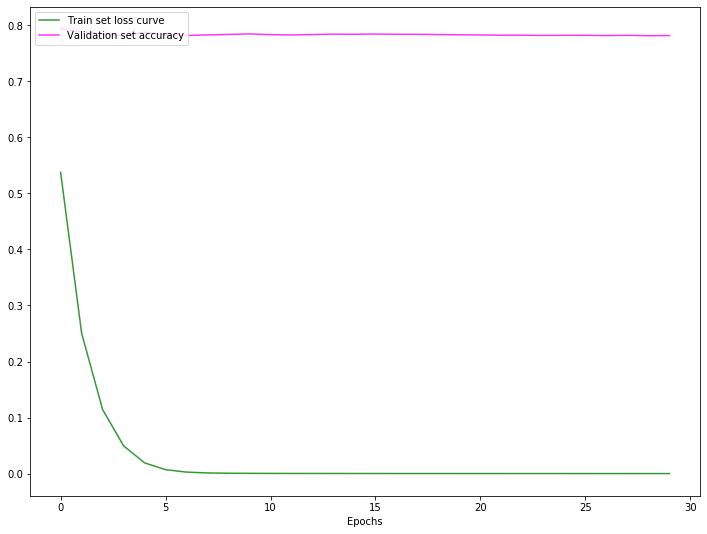

In [99]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(100, 100))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

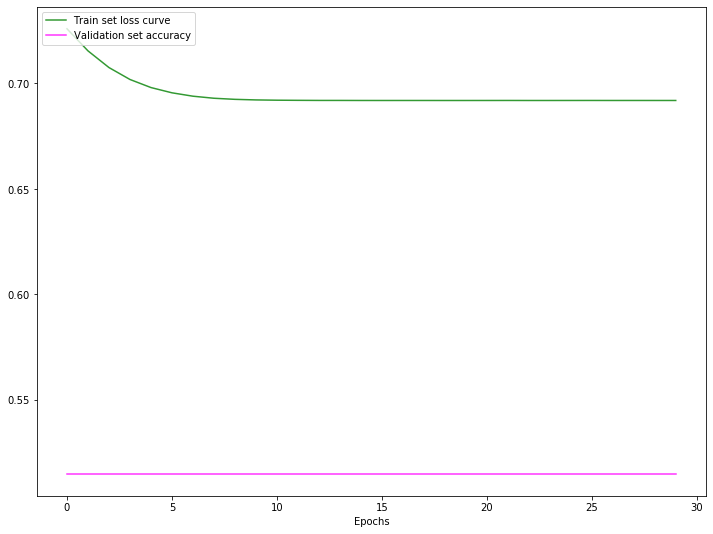

In [100]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(1, 1, 1))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

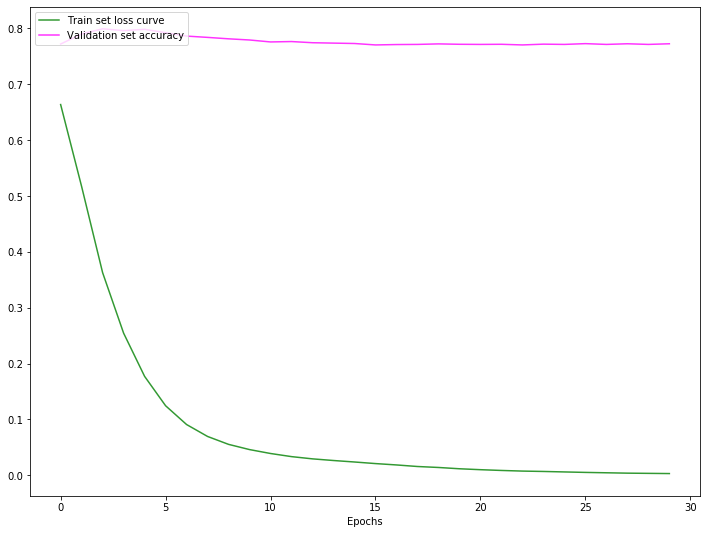

In [101]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(5, 5, 5))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

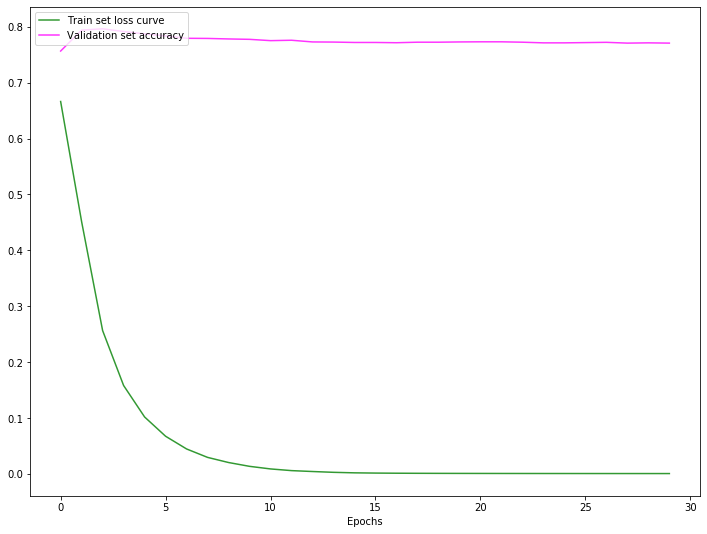

In [102]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(10, 10, 10))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

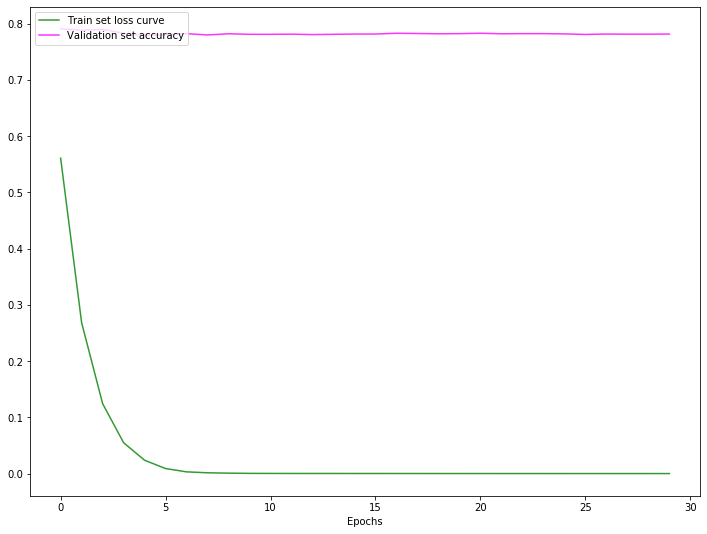

In [103]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(50, 50, 50))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

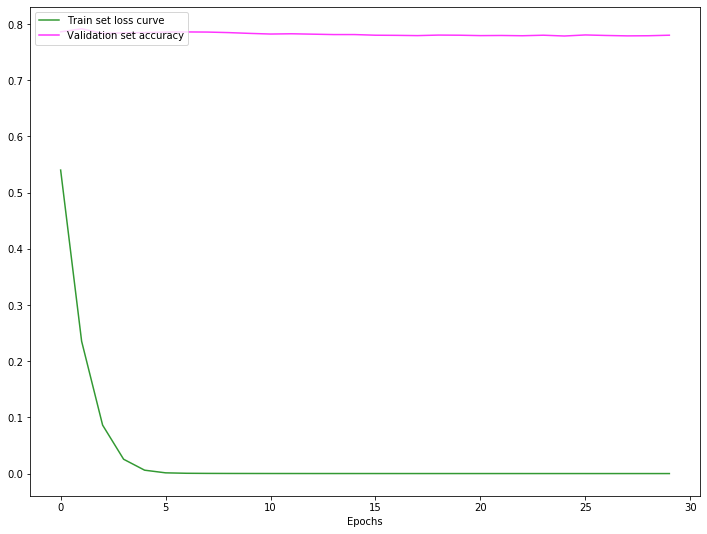

In [104]:
clf = MLP(solver='adam', max_iter=1, warm_start=True, hidden_layer_sizes=(100, 100, 100))

validation_set_scores = []
for i in range(CANTIDAD_EPOCAS):
    clf.partial_fit(X_entrenamiento, Y_entrenamiento, classes=[0, 1])
    Y_predicted_2 = clf.predict(X_validacion)
    validation_set_scores.append(accuracy_score(Y_validacion, Y_predicted_2))
    
plot_curves(clf.loss_curve_, validation_set_scores)

#### Ahora revisamos las curvas que llegan a una exactitud más alta

In [105]:
clf = MLP(solver='adam', max_iter=30, hidden_layer_sizes=(1))
clf.fit(X_entrenamiento, Y_entrenamiento)
Y_predicted = clf.predict(X_validacion)
print(accuracy_score(Y_validacion, Y_predicted))

0.7910552061495457


c:\users\qwesx\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [107]:
clf = MLP(solver='adam', max_iter=30, hidden_layer_sizes=(100))
clf.fit(X_entrenamiento, Y_entrenamiento)
Y_predicted = clf.predict(X_validacion)
print(accuracy_score(Y_validacion, Y_predicted))

0.76659678546471


c:\users\qwesx\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [108]:
clf = MLP(solver='adam', max_iter=30, hidden_layer_sizes=(5, 5))
clf.fit(X_entrenamiento, Y_entrenamiento)
Y_predicted = clf.predict(X_validacion)
print(accuracy_score(Y_validacion, Y_predicted))

0.7679944095038435


c:\users\qwesx\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [109]:
clf = MLP(solver='adam', max_iter=30, hidden_layer_sizes=(10, 10))
clf.fit(X_entrenamiento, Y_entrenamiento)
Y_predicted = clf.predict(X_validacion)
print(accuracy_score(Y_validacion, Y_predicted))

0.7649662240857209


c:\users\qwesx\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [111]:
clf = MLP(solver='adam', max_iter=30, hidden_layer_sizes=(100, 100))
clf.fit(X_entrenamiento, Y_entrenamiento)
Y_predicted = clf.predict(X_validacion)
print(accuracy_score(Y_validacion, Y_predicted))

0.777078965758211


In [110]:
clf = MLP(solver='adam', max_iter=30, hidden_layer_sizes=(5, 5, 5))
clf.fit(X_entrenamiento, Y_entrenamiento)
Y_predicted = clf.predict(X_validacion)
print(accuracy_score(Y_validacion, Y_predicted))

0.7700908455625437


c:\users\qwesx\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [112]:
clf = MLP(solver='adam', max_iter=30, hidden_layer_sizes=(100, 100, 100))
clf.fit(X_entrenamiento, Y_entrenamiento)
Y_predicted = clf.predict(X_validacion)
print(accuracy_score(Y_validacion, Y_predicted))

0.7868623340321453


Por un lado, se puede apreciar que al aumentar la cantidad de capas cuando se tienen muy pocas neuronas, el rendimiento empeora. Sin embargo, a medida que aumentamos la cantidad de neuronas, el agregar capas comienza a ser beneficioso. Una posible razón de esto, es que cuando hay hartas neuronas los pesos de las aristas se logran ajustar mejor con más capas. Por esto podría no resultar útil agregar muchas capas.

Otro punto importante, es que el mejor rendimiento fue con solo una capa intermedia de una neurona. Un posible motivo, es que la dimensionalidad de los vectores es demasiado alta, por lo que se requerirían muchas neuronas (más de las posibles) para relacionar de forma óptima los distintos pesos de las aristas. Luego, una relación más sencilla (más cercana a una relación lineal) entrega un mejor resultado, pues "no hace el trabajo a medias". Sin embargo, al aumentar las neuronas y las capas el clasificador va mejorando su interpretación (dentro de lo posible) y puede adaptar mejor los pesos de sus aristas para llegar a un resultado bastante bueno.

## Actividad 6

In [129]:
# El mejor clasificador MLP encontrado, según el test de validación, fue el siguiente:
# Es importante notar que los puntajes varian al utilizar sets de entrenamiento/validación distintos
clf = MLP(solver='adam', max_iter=30, hidden_layer_sizes=(1))
clf.fit(X_entrenamiento, Y_entrenamiento)

Y_predicted = clf.predict(X_test)
print(accuracy_score(Y_test, Y_predicted))

0.793151642208246


c:\users\qwesx\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [130]:
# Si bien esta red fue la segunda mejor, considero importante destacarla pues es muy distinta en forma a la primera
# y entregó resultados muy similares
clf = MLP(solver='adam', max_iter=30, hidden_layer_sizes=(100, 100, 100))
clf.fit(X_entrenamiento, Y_entrenamiento)

Y_predicted = clf.predict(X_test)
print(accuracy_score(Y_test, Y_predicted))

0.7803400885161892


Nota: son las mismas conclusiones que en la actividad 5 para que no las leas dos veces si eres el mismo corrector

Por un lado, se puede apreciar que al aumentar la cantidad de capas cuando se tienen muy pocas neuronas, el rendimiento empeora. Sin embargo, a medida que aumentamos la cantidad de neuronas, el agregar capas comienza a ser beneficioso. Una posible razón de esto, es que cuando hay hartas neuronas los pesos de las aristas se logran ajustar mejor con más capas. Por esto podría no resultar útil agregar muchas capas.

Otro punto importante, es que el mejor rendimiento fue con solo una capa intermedia de una neurona. Un posible motivo, es que la dimensionalidad de los vectores es demasiado alta, por lo que se requerirían muchas neuronas (más de las posibles) para relacionar de forma óptima los distintos pesos de las aristas. Luego, una relación más sencilla (más cercana a una relación lineal) entrega un mejor resultado, pues "no hace el trabajo a medias". Sin embargo, al aumentar las neuronas y las capas el clasificador va mejorando su interpretación (dentro de lo posible) y puede adaptar mejor los pesos de sus aristas para llegar a un resultado bastante bueno.

## Actividad 7

In [131]:
clf = MLP(solver='adam', max_iter=30, hidden_layer_sizes=(1))
clf.fit(X_entrenamiento, Y_entrenamiento)

Y_predicted = clf.predict(X_test)
print('Resultado predicción set de test:', accuracy_score(Y_test, Y_predicted))

print("Algunos ejemplos:")
for i in range(8):
    print()
    print(f"titular: {X_test_original[i]}")
    print("predicción: {}SARCASTIC, label original: {}SARCASTIC".format(Y_predicted[i]*'NOT ', Y_test[i]*'NOT '))

Resultado predicción set de test: 0.7731190309806663
Algunos ejemplos:

titular: fantasy baseball team suffers major setback owner embarks weeklong honeymoon internet access
predicción: SARCASTIC, label original: NOT SARCASTIC

titular: photographer documents grandmothers illness searching
predicción: NOT SARCASTIC, label original: SARCASTIC

titular: marvelous mess
predicción: SARCASTIC, label original: SARCASTIC

titular: man arriving late forced use excuse saving leaving early
predicción: NOT SARCASTIC, label original: NOT SARCASTIC

titular: millions shrimp airlifted oil spill disaster zone
predicción: NOT SARCASTIC, label original: NOT SARCASTIC

titular: mrs. jones singer billy paul died
predicción: NOT SARCASTIC, label original: SARCASTIC

titular: trumps jerusalem embassy ceremony big dog whistle
predicción: SARCASTIC, label original: SARCASTIC

titular: new act, tommy tune vows vitamin spirit
predicción: NOT SARCASTIC, label original: SARCASTIC


c:\users\qwesx\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Dentro de los resultados obtenidos encontramos que ambos clasificadores logran clasificar bien titulares como "trumps jerusalem embassy ceremony big dog whistle", "marvelous mess" y "man arriving late forced use excuse saving leaving early". 

También notamos que ambos clasificadores se equivocan al categorizar titulares como "fantasy baseball team suffers major setback owner embarks weeklong honeymoon internet access" y "new act, tommy tune vows vitamin spirit"

Sin embargo, difieren (solo uno de los dos se equivoca) en los titulares de la forma "photographer documents grandmothers illness searching", "millions shrimp airlifted oil spill disaster zone" o "mrs. jones singer billy paul died". 

Del primer grupo, podemos decir que (en general) son titulares donde hay pocas palabras que no se repitan o se repitan pocas veces en el histograma de frecuencias (es decir, en el set de entrenamiento), por lo que debe ser más fácil clasificarlas. Por otro lado el segundo y tercer grupo, parecieran tener palabras que se repiten mucho menos (o no se repiten) en el set de entrenamiento como "shrimp", "airlifted", "embarks", "honeymoon", "grandmothers", etc. Esto tiene bastante sentido, pues la información entregada por estas palabras es poco certera y sacar conclusiones a partir de estas palabras puede resultar en errores de clasificación producidos solo por este sesgo